# understand evaluation metrics

✅ Loss Function – Measures how far off predictions are from actual labels.
✅ Accuracy – Percentage of correct predictions.
✅ Precision & Recall – Important for imbalanced datasets.
✅ Confusion Matrix – Helps understand false positives & false negatives.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [2]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(1000, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)

# Split into train & test sets
split = int(0.8 * len(X))  # 80% train, 20% test
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [4]:
model = keras.Sequential([
    keras.layers.Dense(8, activation='relu', input_shape=(2,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [5]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5012 - loss: 0.6821 - val_accuracy: 0.5650 - val_loss: 0.6746
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5242 - loss: 0.6760 - val_accuracy: 0.5800 - val_loss: 0.6676
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5365 - loss: 0.6721 - val_accuracy: 0.6100 - val_loss: 0.6604
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5756 - loss: 0.6618 - val_accuracy: 0.6250 - val_loss: 0.6520
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6040 - loss: 0.6519 - val_accuracy: 0.6450 - val_loss: 0.6426
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6208 - loss: 0.6456 - val_accuracy: 0.6750 - val_loss: 0.6330
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6657 - loss: 0.6307 - val_accuracy: 0.6850 - val_loss: 0.6221
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6611 - loss: 0.6285 - val_accuracy: 0.6900 - val_loss

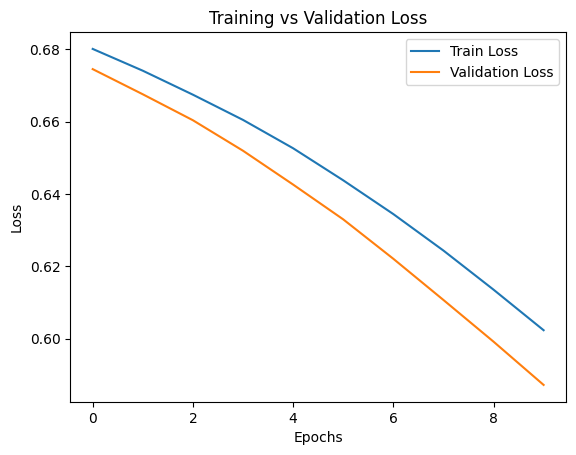

In [6]:
# Plot loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


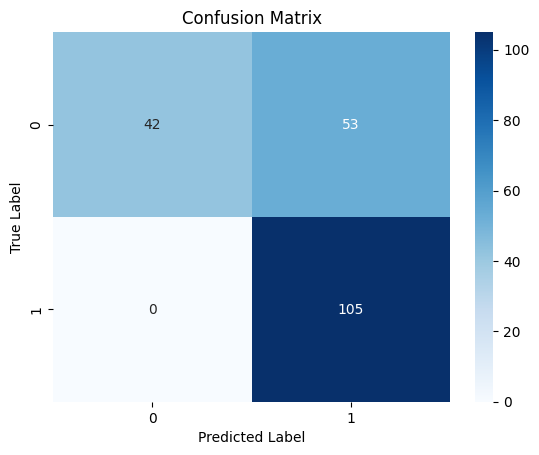

              precision    recall  f1-score   support

           0       1.00      0.44      0.61        95
           1       0.66      1.00      0.80       105

    accuracy                           0.73       200
   macro avg       0.83      0.72      0.71       200
weighted avg       0.82      0.73      0.71       200



In [7]:
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))


# Training a Simple Neural Network on MNIST (Multi-Layer Perceptron - MLP)

In [8]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize images (scale pixel values to 0-1 range)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Check dataset shape
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Training Data Shape: (60000, 28, 28)
Testing Data Shape: (10000, 28, 28)


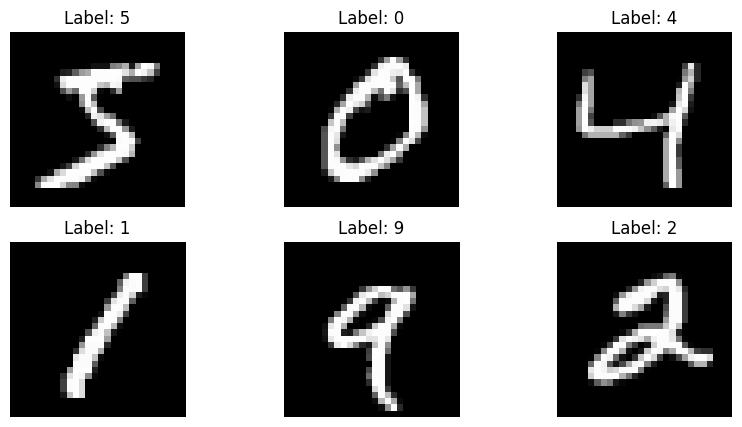

In [9]:
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Label: {y_train[i]}")
plt.show()


In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 1D array
    keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    keras.layers.Dense(10, activation='softmax')  # Output layer (10 classes for digits 0-9)
])


In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8800 - loss: 0.4364 - val_accuracy: 0.9572 - val_loss: 0.1408
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9626 - loss: 0.1237 - val_accuracy: 0.9687 - val_loss: 0.1051
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9758 - loss: 0.0805 - val_accuracy: 0.9707 - val_loss: 0.0947
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9837 - loss: 0.0555 - val_accuracy: 0.9751 - val_loss: 0.0781
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9869 - loss: 0.0443 - val_accuracy: 0.9772 - val_loss: 0.0758
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9896 - loss: 0.0338 - val_accuracy: 0.9773 - val_loss: 0.0743
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9928 - loss: 0.0249 - val_accuracy: 0.9767 - val_loss: 0.0774
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9940 - loss: 0.0206 -

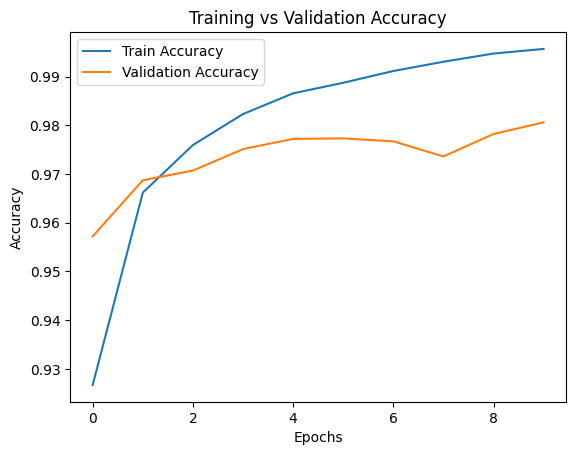

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9774 - loss: 0.0882  
Test Accuracy: 98.06%
